### NYC Airbnb Data Visualization and Analysis 

##### Project description: 
This project uses a dataset that contains almost 50k airbnb listings in NYC. Information about the listings include room info, host info, neighbourhoods, geographical location, reviews, availability and etc. 

The purpose of this task is to predict the price of NYC Airbnb rentals based on the data provided and any external datasets with relevant information. 

The dataset is from Kaggle: https://www.kaggle.com/code/ssslll007/nyc-airbnb-data-visualization-and-analysis

The link: https://www.kaggle.com/code/ssslll007/nyc-airbnb-data-visualization-and-analysis


#### Proejct Pipeline: 
1. Data extract and preprocessing: Missing values & Abnormal values & Redundant features

2. Explolratory data analysis and visualization: Price related and Geographical distributions

3. Prediction using two of the most popular techniques: Linear Regression and Gradient Bossting 

4. Summary

In [11]:

import sys
print(sys.executable)


/opt/anaconda3/bin/python


In [12]:
!"c:\\Users\\Laura.Yu\\AppData\\Local\\Programs\\Python\\Python311\\python.exe" -m pip install seaborn

zsh:1: command not found: c:\Users\Laura.Yu\AppData\Local\Programs\Python\Python311\python.exe


In [13]:
!"c:\\Users\\Laura.Yu\\AppData\\Local\\Programs\\Python\\Python311\\python.exe" -m pip install missingno

zsh:1: command not found: c:\Users\Laura.Yu\AppData\Local\Programs\Python\Python311\python.exe


In [14]:
!pip install missingno

In [9]:
import pandas as pd
import numpy as np 
import matplotlib
import matplotlib.pyplot as plt 
import seaborn as sns 
import missingno as msno 

In [10]:
# pycharm configuration to display the whole dataframe printed in the "run" output
pd.set_option('display.width', 400)
pd.set_option('display.max_columns', 10)

## Data Extract and Preprocessing 

In [15]:
airbnb = pd.read_csv ('AB_NYC_2019.csv')

In [16]:
print('number of samples:', airbnb.shape[0])
print('number of columns:', airbnb.shape[1])

number of samples: 48895
number of columns: 16


Check null values. Important questions when thinking about missing data: 
1. How prevalent is the missing data? 

2. Is missing data random or does it have a pattern? 

In [19]:
print('Dataframe: \n')
print(airbnb.info(verbose=True))
print('\nNull Values in datasets:\n')
print(airbnb.isnull().sum().sort_values(ascending=False))
print('\nPercentage of null values in last_review column: ', round(airbnb['last_review'].isnull().sum()/len(airbnb)*100,2), '%')

Dataframe: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review        

From the above result, we can see both last_review and reviews_per_month have the same large amount of null values. Also number of null values for host_names and name are different, so maybe there is something worth exploring. 

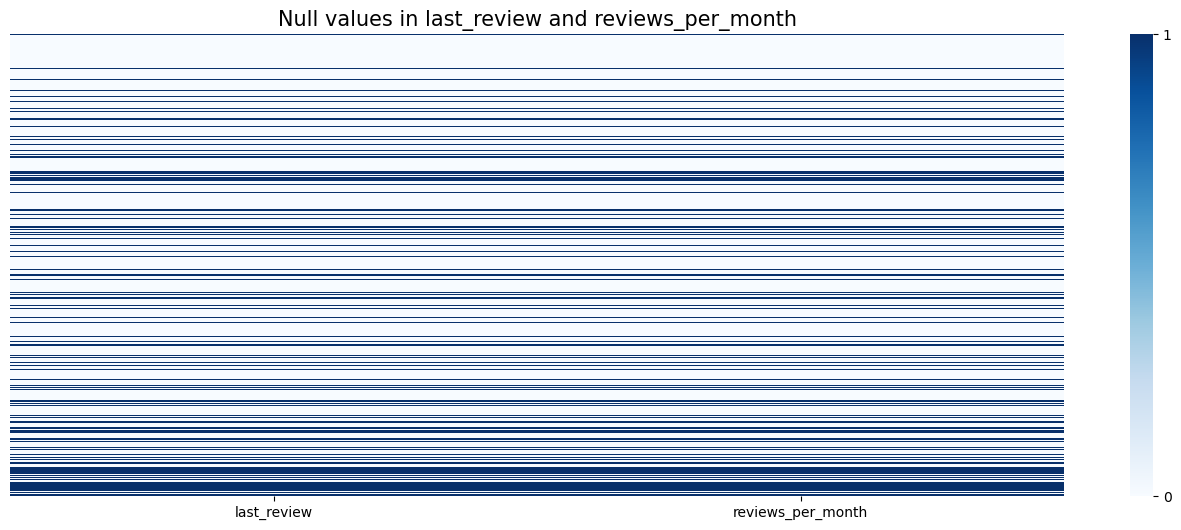

In [33]:
fig, ax = plt.subplots(figsize=(17,6))
plt.title ('Null values in last_review and reviews_per_month', fontsize=15)

sns.heatmap(airbnb[['last_review', 'reviews_per_month']].isnull(), cmap='Blues', yticklabels=False, ax=ax, cbar_kws={'ticks': [0, 1]})
# sns.heatmap is used to visualise missing values as heatmap 
# yticklabels=False hides row labels 
# cbar_kws ={'ticks=[0, 1]} sets the color bar ticks to show 0 (not null) and 1 (null)
plt.show()

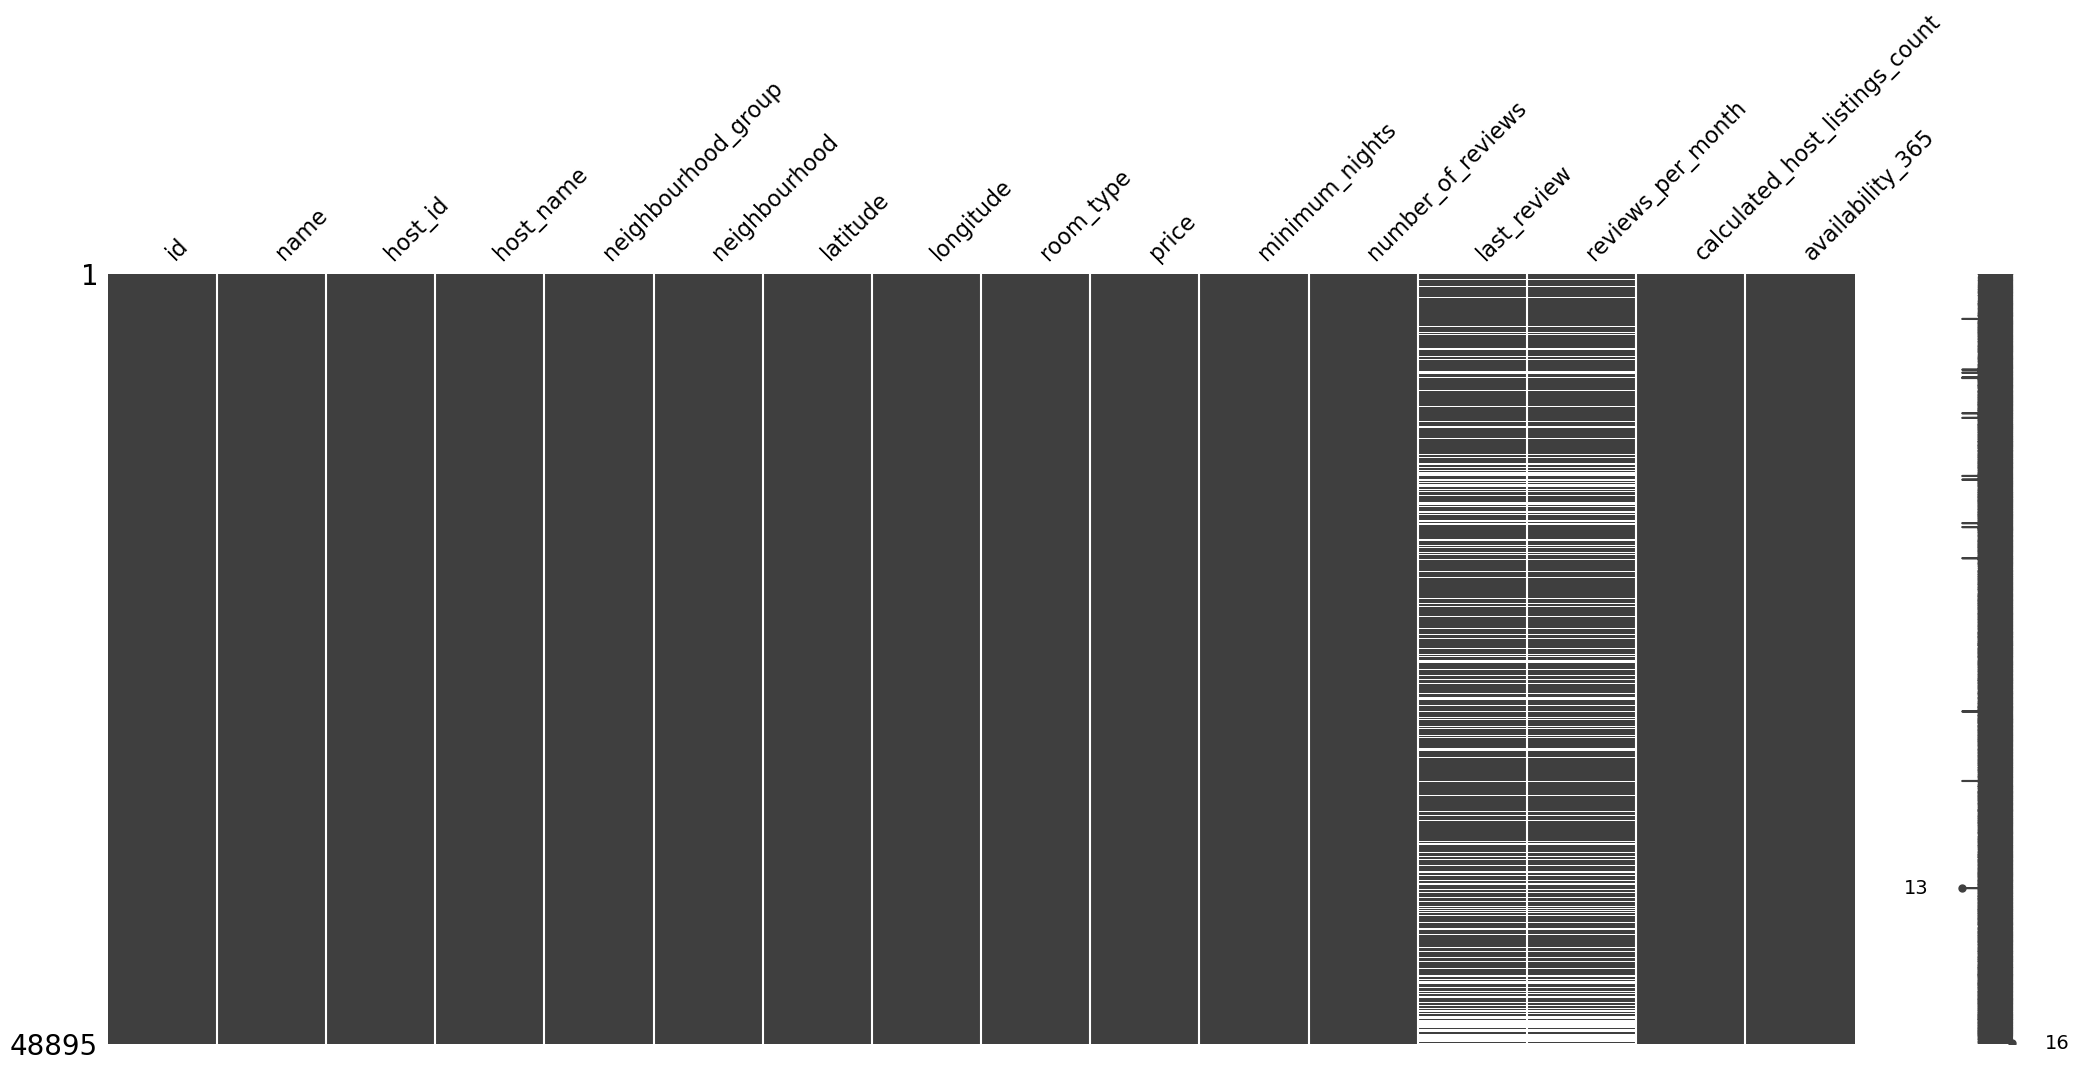

In [34]:
# visualize the columns with missing values to see how they are distributed 
msno.matrix(airbnb)
plt.show()

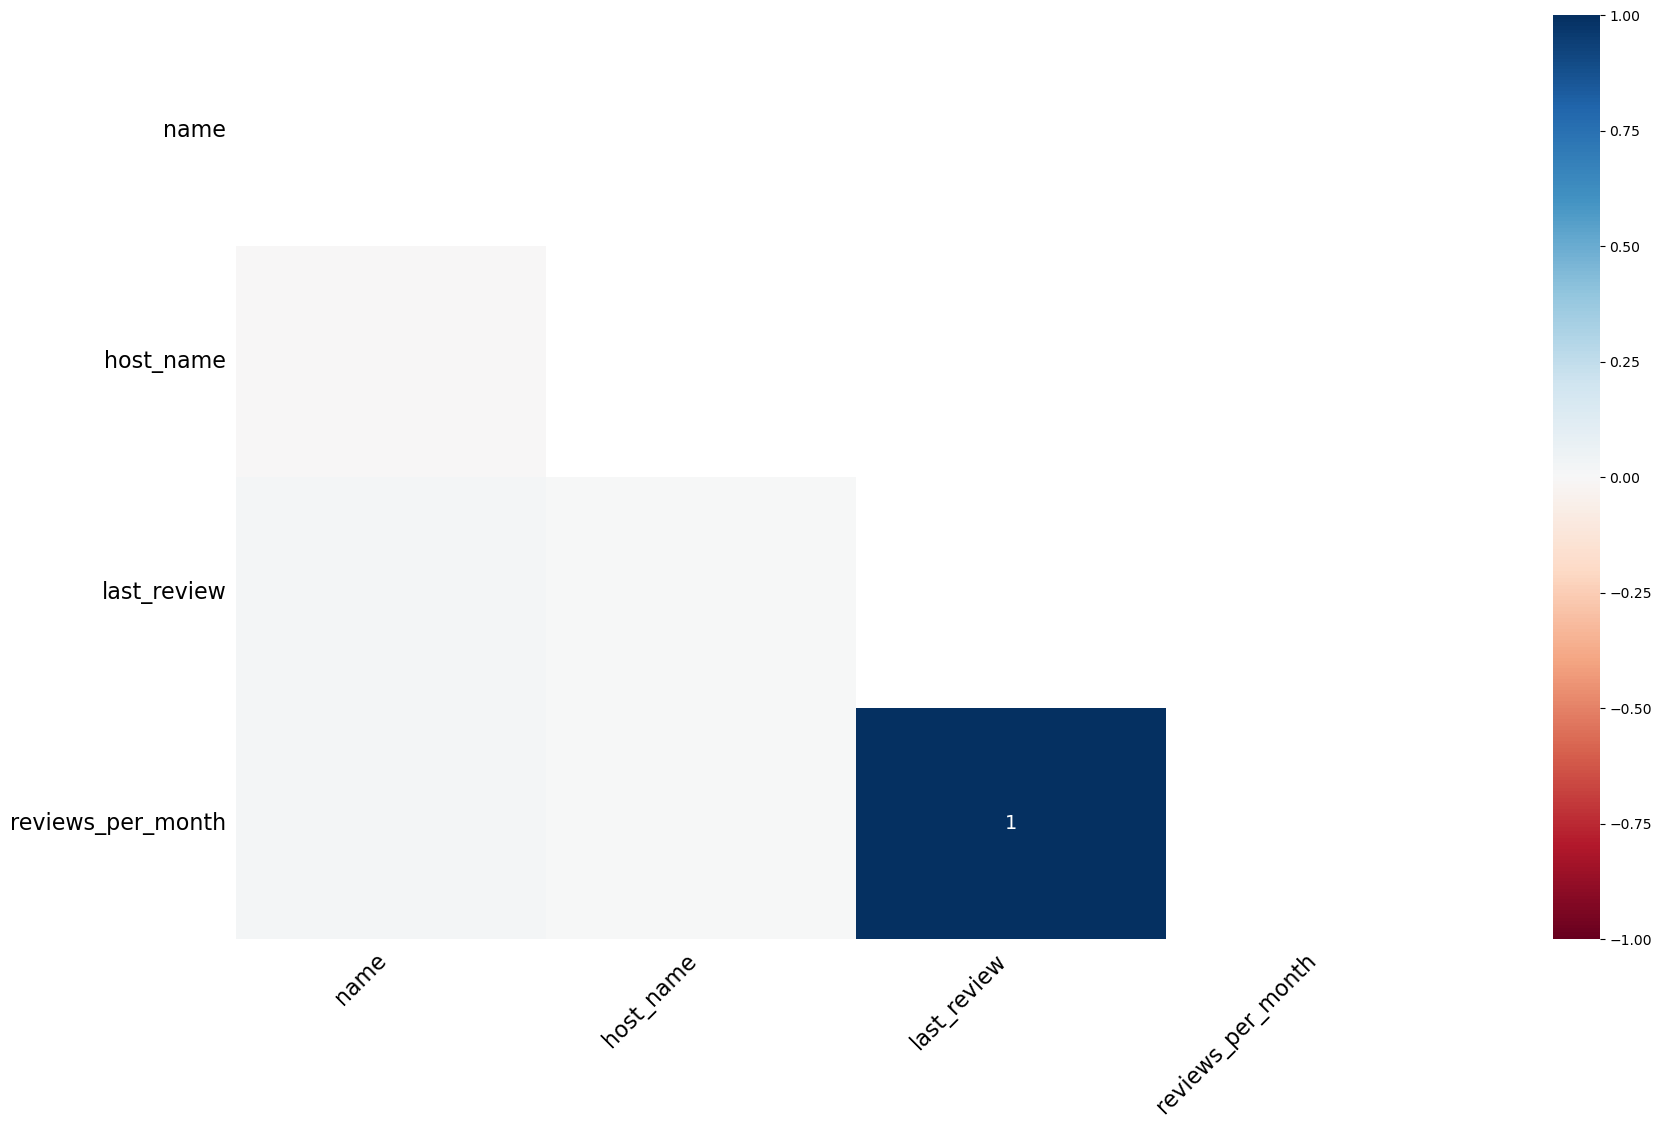

In [35]:
# using the matrix function we can very quickly find that review_per_month and last review have a very similar pattern of missing values while missing values from host_name dont show such pattern.
msno.heatmap(airbnb)
plt.show()

In [36]:
# using the heatmap function, we can tell correlation of missingness between reviews_per_month and last_review is 1, which means if one veriable appears then the other variable is very likely to be present. 

# also it seems column number_of_reviews usually has a value of 0 when last_review is null. So column last_review may be dropped

airbnb.drop('last_review', axis=1, inplace=True)

In [37]:
# and we will fillna the other columns that have null values 
airbnb['reviews_per_month'].fillna(value=0, inplace=True)
airbnb['name'].fillna(value='$', inplace=True)
airbnb['host_name'].fillna(value='#', inplace=True)

In [38]:
# there are a few listings with zero listing price. whats the purpose of listing a place asking for 0 dollars? are those legit data entries? 
zero_price = airbnb[airbnb['price']== 0]
print(zero_price.head(3))

             id                                               name    host_id     host_name neighbourhood_group  ... minimum_nights  number_of_reviews  reviews_per_month calculated_host_listings_count  availability_365
23161  18750597  Huge Brooklyn Brownstone Living, Close to it all.    8993084      Kimberly            Brooklyn  ...              4                  1               0.05                              4                28
25433  20333471      ★Hostel Style Room | Ideal Traveling Buddies★  131697576        Anisha               Bronx  ...              2                 55               2.56                              4               127
25634  20523843    MARTIAL LOFT 3: REDEMPTION (upstairs, 2nd room)   15787004  Martial Loft            Brooklyn  ...              2                 16               0.71                              5                 0

[3 rows x 15 columns]


In [39]:
# there are 11 listings with 0 prices, yet nothing looks special about those listings. get rid of those 0 priced listings as they can be misleading. 

airbnb = airbnb[airbnb['price']>0]

In [45]:
# check if all null values are handled 
print('Null values in datasets:\n')
print(airbnb.isnull().sum().sort_values(ascending=False))


Null values in datasets:

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64


In [46]:
# learn about dtypes of each feature in the dataframe 
print('\nData types: \n')
print(airbnb.info(verbose=True))


Data types: 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48884 entries, 0 to 48894
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48884 non-null  int64  
 1   name                            48884 non-null  object 
 2   host_id                         48884 non-null  int64  
 3   host_name                       48884 non-null  object 
 4   neighbourhood_group             48884 non-null  object 
 5   neighbourhood                   48884 non-null  object 
 6   latitude                        48884 non-null  float64
 7   longitude                       48884 non-null  float64
 8   room_type                       48884 non-null  object 
 9   price                           48884 non-null  int64  
 10  minimum_nights                  48884 non-null  int64  
 11  number_of_reviews               48884 non-null  int64  
 12  reviews_per_month

In [44]:
# generate descriptive statistics that summarize the central tendency, dispersion and shape of a dataset's distribution 
print('\nData descriptive: \n')
print(airbnb.describe())


Data descriptive: 

                 id       host_id      latitude     longitude         price  minimum_nights  number_of_reviews  reviews_per_month  calculated_host_listings_count  availability_365
count  4.888400e+04  4.888400e+04  48884.000000  48884.000000  48884.000000    48884.000000       48884.000000       48884.000000                    48884.000000      48884.000000
mean   1.901679e+07  6.762203e+07     40.728953    -73.952176    152.755053        7.029887          23.271991           1.090800                        7.144628        112.779498
std    1.098432e+07  7.861666e+07      0.054532      0.046159    240.170260       20.512224          44.551331           1.597213                       32.956185        131.627271
min    2.539000e+03  2.438000e+03     40.499790    -74.244420     10.000000        1.000000           0.000000           0.000000                        1.000000          0.000000
25%    9.470548e+06  7.817310e+06     40.690100    -73.983080     69.000000    

Exploratory data analysis 